### Import dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv(r"../DataSets/Amazon data analysis/train.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../DataSets/Amazon data analysis/train.csv'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249698 entries, 0 to 2249697
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   PRODUCT_ID       int64  
 1   TITLE            object 
 2   BULLET_POINTS    object 
 3   DESCRIPTION      object 
 4   PRODUCT_TYPE_ID  int64  
 5   PRODUCT_LENGTH   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 103.0+ MB


### Column Types

- Numerical - PRODUCT_ID,PRODUCT_LENGTH
- NLP - TITLE, BULLET_POINTS, DESCRIPTION
- Categorical - PRODUCT_TYPE_ID

### Issues with the dataset

No unique indentification key

1. Dirty Data
    Table - train
   - missing data in bullet points and description
   - starting product id use diffrent language and have majorty value missing
   - data contian emojis.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249698 entries, 0 to 2249697
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   PRODUCT_ID       int64  
 1   TITLE            object 
 2   BULLET_POINTS    object 
 3   DESCRIPTION      object 
 4   PRODUCT_TYPE_ID  int64  
 5   PRODUCT_LENGTH   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 103.0+ MB


In [7]:
df.shape

(2249698, 6)

In [8]:
print("no of unique value:",df['PRODUCT_TYPE_ID'].nunique())
print("percent of unique value:",df['PRODUCT_TYPE_ID'].nunique()/df.shape[0])

no of unique value: 12907
percent of unique value: 0.005737214506124822


In [9]:
df['PRODUCT_ID'].nunique()

2249698

In [10]:
print("no. of null values :",(df['TITLE'].isnull()).sum())
print("percent of null values :",(df['TITLE'].isnull()).sum()/df.shape[0])
print("no. of duplicate values :",df['TITLE'].duplicated().sum())
print("percent  of duplicate values :",df['TITLE'].duplicated().sum()/df.shape[0])

no. of null values : 12
percent of null values : 5.334049281281309e-06
no. of duplicate values : 38935
percent  of duplicate values : 0.017306767397223984


In [11]:
print("no. of null values :",(df['BULLET_POINTS'].isnull()).sum())
print("percent of null values :",(df['BULLET_POINTS'].isnull()).sum()/df.shape[0])
print("no. of duplicate values :",df['BULLET_POINTS'].duplicated().sum()-df['BULLET_POINTS'].isnull().sum())
print("percent  of duplicate values :",(df['BULLET_POINTS'].duplicated().sum()-df['BULLET_POINTS'].isnull().sum())/df.shape[0])

no. of null values : 837364
percent of null values : 0.37221173686423686
no. of duplicate values : 447003
percent  of duplicate values : 0.1986946692400491


In [12]:
print("no. of null values :",(df['DESCRIPTION'].isnull()).sum())
print("percent of null values :",(df['DESCRIPTION'].isnull()).sum()/df.shape[0])
print("no. of duplicate values :",df['DESCRIPTION'].duplicated().sum()-df['DESCRIPTION'].isnull().sum())
print("percent  of duplicate values :",(df['DESCRIPTION'].duplicated().sum()-df['DESCRIPTION'].isnull().sum())/df.shape[0])

no. of null values : 1157381
percent of null values : 0.5144606076015537
no. of duplicate values : 347041
percent  of duplicate values : 0.15426114971876226


In [13]:
if(df.duplicated().sum()):
    print("no of duplicates are :",df.duplicated().sum())
else:
    print("dataset dont have any duplicate")

dataset dont have any duplicate


In [14]:
df.describe()

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH
count,2.249698e+06,2.249698e+06,2.249698e+06
mean,1.499795e+06,4.000456e+03,4.071839e+03
std,8.661944e+05,3.966146e+03,1.351685e+06
min,1.000000e+00,0.000000e+00,1.000000e+00
25%,7.494795e+05,2.300000e+02,5.118110e+02
50%,1.499558e+06,2.916000e+03,6.630000e+02
75%,2.250664e+06,6.403000e+03,1.062992e+03
max,2.999999e+06,1.342000e+04,1.885801e+09


In [15]:
df['PRODUCT_LENGTH'].min(),df['PRODUCT_LENGTH'].max()

(1.0, 1885801400.0)

In [16]:
df.corr()

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH
PRODUCT_ID,1.000000,0.250576,0.000424
PRODUCT_TYPE_ID,0.250576,1.000000,0.000961
PRODUCT_LENGTH,0.000424,0.000961,1.000000


In [17]:
grp=df.groupby('PRODUCT_TYPE_ID')

In [18]:
sns.lineplot(grp.agg({'PRODUCT_LENGTH':'mean'}))

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: If using all scalar values, you must pass an index

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
D:\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
D:\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
D:\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
D:\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduc

<AxesSubplot:xlabel='PRODUCT_TYPE_ID'>

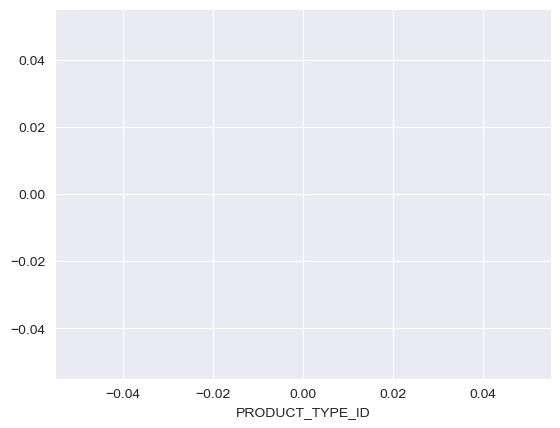

In [19]:
sns.lineplot(df['PRODUCT_TYPE_ID'].value_counts())